In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datos


In [ ]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS3Zbvu738Xi67ARfeqxG-Z46zXqTSK-sZUyEi9vRnFkQY7YJfNRdRt9iT4iXhYPg/pub?gid=1698849688&single=true&output=csv'

In [ ]:
# MS : indica frecuencia mensual

df = pd.read_csv(link,index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.columns = ['Pasajeros']

In [ ]:
df.head()

,Pasajeros
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


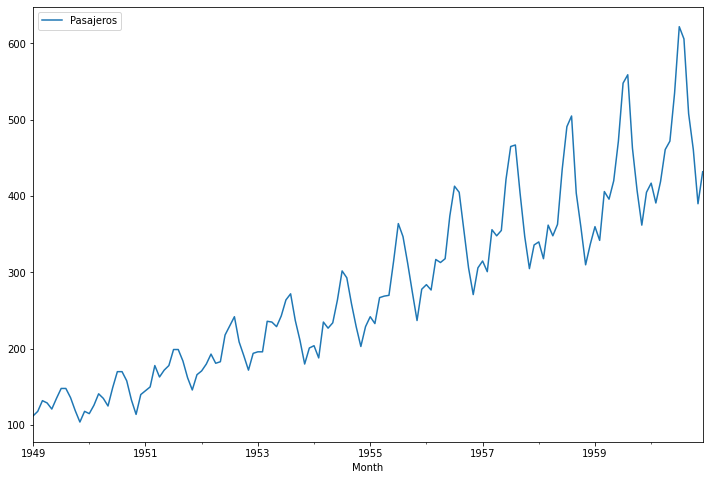

In [ ]:
df.plot(figsize=(12,8))
# en la figura se observa estacionalidad y tendencia creciente

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


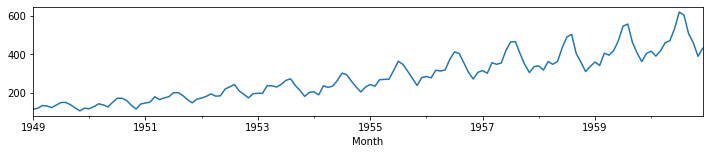

In [ ]:
results = seasonal_decompose(df['Pasajeros'])
results.observed.plot(figsize=(12,2))

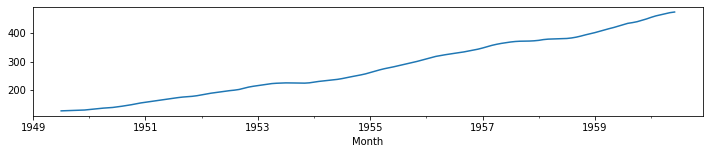

In [ ]:
results.trend.plot(figsize=(12,2))

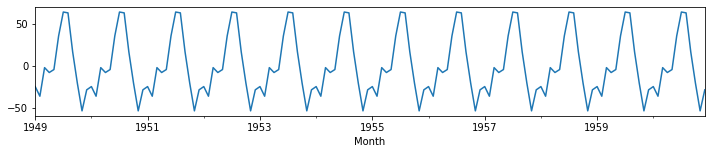

In [ ]:
results.seasonal.plot(figsize=(12,2))

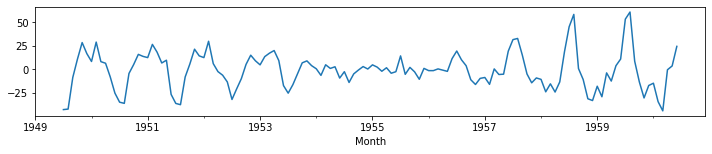

In [ ]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [ ]:
len(df)

144

In [ ]:
# longitud data de entrenamiento
len(df)-12 

132

In [ ]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [ ]:
len(test)

12

## Escalando los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

Este generador toma una secuencia de puntos de datos (como una sereie temporal) espaciados en intervalos iguales, teniendo en cuenta otros parámetros de series temporales, para producir batches para el entrenamiento / validación.

#### Argumentos
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703],
       [0.        ],
       [0.03076923],
       [0.02417582],
       [0.04835165],
       [0.08131868],
       [0.06813187],
       [0.04615385],
       [0.0989011 ],
       [0.14505495],
       [0.14505495],
       [0.11868132],
       [0.06373626],
       [0.02197802],
       [0.07912088],
       [0.09010989],
       [0.1010989 ],
       [0.16263736],
       [0.12967033],
       [0.14945055],
       [0.16263736],
       [0.20879121],
       [0.20879121],
       [0.17582418],
       [0.12747253],
       [0.09230769],
       [0.13626374],
       [0.14725275],
       [0.16703297],
       [0.1956044 ],
       [0.16923077],
       [0.17362637],
       [0.25054945],
       [0.27692308],
       [0.3032967 ],
       [0.23076923],
       [0.19120879],
       [0.14945055],
       [0.197

In [ ]:
# Definimos el generator
n_input = 2
n_features = 1
# se repite scaled_train porque el input es igual al output
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(scaled_train)

132

In [ ]:
len(generator) # n_input = 2

130

In [ ]:
scaled_train[:5]

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264]])

In [ ]:
# ¿Cómo luce el primer batch?
generator[0]

(array([[[0.01758242],
         [0.03076923]]]), array([[0.06153846]]))

In [ ]:
# X son los inputs , y el tercer punto (predicción en función de los 2 primeros datos)

X,y = generator[0]

In [ ]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.01758242 0.03076923]
Predicción: 
 [[0.06153846]]


Cambio los valores de n_input

In [ ]:
# Vamos a redefinir para que utilice 12 meses y luego prediga el próximo mes
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# ¿Cómo luce el primer batch?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01758242 0.03076923 0.06153846 0.05494505 0.03736264 0.06813187
 0.0967033  0.0967033  0.07032967 0.03296703 0.         0.03076923]
Predict this y: 
 [[0.02417582]]


### Creando el Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


120/120 [==============================] - 3s 9ms/step - loss: 0.0269
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0135
Epoch 3/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0137
Epoch 4/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 5/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0096
Epoch 6/50
120/120 [==============================] - 2s 13ms/step - loss: 0.0084
Epoch 7/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0093
Epoch 8/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0102
Epoch 9/50
120/120 [==============================] - 1s 9ms/step - loss: 0.0052
Epoch 10/50
120/120 [==============================] - 1s 12ms/step - loss: 0.0092
Epoch 11/50
120/120 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 12/50
120/120 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 13/50
120/120 [========

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

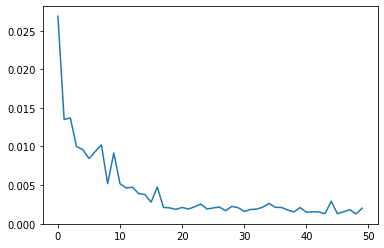

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluando en los Datos de Prueba (Test)

In [ ]:
# 12 meses de historia ---> predecir el 13
# Necesitaremos los últimos 12 meses del conjunto de entrenamiento para predecir el 1er mes en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.56263736],
       [0.52307692],
       [0.66373626],
       [0.64175824],
       [0.69450549],
       [0.80879121],
       [0.97582418],
       [1.        ],
       [0.78901099],
       [0.66593407],
       [0.56703297],
       [0.66153846]])

In [ ]:
# la forma original de first_eval_batch
first_eval_batch.shape

(12, 1)

In [ ]:
X.shape  # dimensiones deseadas

(1, 12, 1)

In [ ]:
# redimensionamiento

first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
# verificamos el nuevo dimensionamiento
first_eval_batch.shape

(1, 12, 1)

In [ ]:
# devuelve el mes 13 (coincide con el primer dato de test)

model.predict(first_eval_batch)

array([[0.5867913]], dtype=float32)

In [ ]:
scaled_test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba.
----

In [ ]:
# en lugar de len(test) podemos colocar la cantidad de meses a futuro que se quiere predecir

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(2*len(test)):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
# y_pred
test_predictions

[array([0.5867913], dtype=float32),
 array([0.5875604], dtype=float32),
 array([0.6534219], dtype=float32),
 array([0.6827079], dtype=float32),
 array([0.7670375], dtype=float32),
 array([0.94681334], dtype=float32),
 array([1.1318572], dtype=float32),
 array([1.1541781], dtype=float32),
 array([0.9507978], dtype=float32),
 array([0.7570051], dtype=float32),
 array([0.664979], dtype=float32),
 array([0.65980756], dtype=float32),
 array([0.6168119], dtype=float32),
 array([0.6236274], dtype=float32),
 array([0.66565514], dtype=float32),
 array([0.71988213], dtype=float32),
 array([0.8653947], dtype=float32),
 array([1.1111853], dtype=float32),
 array([1.3299943], dtype=float32),
 array([1.3762065], dtype=float32),
 array([1.1683941], dtype=float32),
 array([0.9003265], dtype=float32),
 array([0.7584517], dtype=float32),
 array([0.6941874], dtype=float32)]

In [ ]:
# y_test
scaled_test

array([[0.68791209],
       [0.63076923],
       [0.69230769],
       [0.78461538],
       [0.80879121],
       [0.94725275],
       [1.13846154],
       [1.1032967 ],
       [0.88791209],
       [0.78461538],
       [0.62857143],
       [0.72087912]])

## Transformación inversa y Comparación

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# y_pred original
true_predictions

array([[370.990031  ],
       [371.33998895],
       [401.30695486],
       [414.63209713],
       [453.00206745],
       [534.80007195],
       [618.99500632],
       [629.15105486],
       [536.61299729],
       [448.43731844],
       [406.56543636],
       [404.21244109],
       [384.64940155],
       [387.75047803],
       [406.87308693],
       [431.54636943],
       [497.75459373],
       [609.58931708],
       [709.147416  ],
       [730.17396533],
       [635.61931038],
       [513.64855313],
       [449.0955236 ],
       [419.85526824]])

In [ ]:
# y_test original
test = test.reset_index()

Concatenar axis = 1 pone tablas una al lado de otra

In [ ]:
# guardamos y_pred en el df test
test2 = pd.concat([test,pd.DataFrame(true_predictions)],axis =1)

In [ ]:
test2

,Month,Pasajeros,0
0,1960-01-01,417.0,370.990031
1,1960-02-01,391.0,371.339989
2,1960-03-01,419.0,401.306955
3,1960-04-01,461.0,414.632097
4,1960-05-01,472.0,453.002067
5,1960-06-01,535.0,534.800072
6,1960-07-01,622.0,618.995006
7,1960-08-01,606.0,629.151055
8,1960-09-01,508.0,536.612997
9,1960-10-01,461.0,448.437318


Concat axis = 0, pone tablas una debajo de otra

In [ ]:
# concatenamos df con test

df_total = pd.concat([df,test2],axis =0)

In [ ]:
x = np.arange(0,len(df_total),1).reshape(-1,1)
len(x)

168

In [ ]:
len(df_total.iloc[:,-1].values)

168

In [ ]:
df_total.columns

Index(['Pasajeros', 'Month', 0], dtype='object')

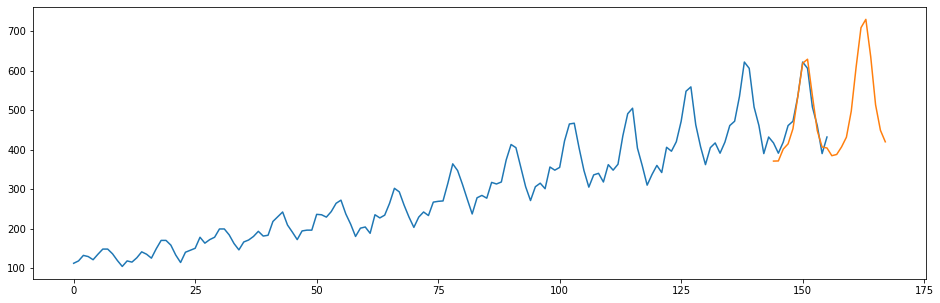

In [ ]:
# comparando y_pred, vs y_test
plt.figure(figsize =(16,5))

plt.plot(x,df_total.Pasajeros)
plt.plot(x,df_total.iloc[:,-1].values)

# Guardar un Modelo

In [ ]:
model.save('my_rnn_model.h5')

# Cargar un Modelo

In [ ]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
